# **Project Name**    - **Predictive Pulse: Harnessing Machine Learning for Blood Pressure Analysis**



##                 **Project Type**    - **Classification + EDA (Exploratory Data Analysis)**
##                 **Contribution**    - **Individual**


# **ProjectProblem Statement:**
High blood pressure is a silent killer and often goes undiagnosed until complications arise. Timely detection and classification of blood pressure stages can help in early intervention. This model aims to classify patients into proper BP stages using input features commonly available during basic screening.



# **Project Summary -** 
This project focuses on building a machine learning model to predict the stage of blood pressure (Normal, Elevated, Hypertension Stage 1, etc.) based on patient data such as symptoms, diagnosis history, and blood pressure readings. The project includes thorough EDA, preprocessing, model training, evaluation, and deployment via a Streamlit web app.
Dataset Features:
Key features include:

Demographics: Age group, gender

Clinical Info: Systolic & Diastolic BP, Pulse Pressure

Symptoms: Nose bleeding, breath shortness, visual changes

Lifestyle: Controlled diet, medication status

History: Time since diagnosis, previous records

🛠️ ML Pipeline:
Preprocessing: Handling missing values, encoding categoricals

Feature Engineering: Pulse pressure calculation, one-hot encoding for age & diagnosis history

Models Used: Logistic Regression, Random Forest, Decision Tree, Naive Bayes, and XGBoost

Best Accuracy Achieved: ✅ 71.51% with XGBoost

Explainability: Feature importance and confidence score shown in app

Deployment: Streamlit-based interactive web interface

# **Project Outcome -** 
 A deployable ML solution that enables real-time stage detection of blood pressure using basic patient information. It can be integrated into hospital systems, health checkup kiosks, or mobile apps to assist general physicians and patients in proactive healthcare.

# **GitHub Link -** https://github.com/Gaurav215b/Predictive-Pulse-Harnessing-Machine-Learning-for-Blood-Pressure-Analysis-/

## **Project:-**

## Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("patient_data.csv")

In [3]:
df

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL


In [4]:
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [5]:
df.tail()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1824,Female,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL


In [6]:
Total_rows = df.shape[0]
Total_columns = df.shape[1]
print(f"The Shape of the Patient Dataset is: {Total_rows} X {Total_columns}")

The Shape of the Patient Dataset is: 1825 X 14


In [7]:
df.isnull().sum()

C                  0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

In [8]:
print(df.duplicated())
print(df.duplicated().tail().sum())
print(df.duplicated().head().sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1820     True
1821     True
1822     True
1823     True
1824     True
Length: 1825, dtype: bool
5
0


In [9]:
df.columns.tolist()

['C',
 'Age',
 'History',
 'Patient',
 'TakeMedication',
 'Severity',
 'BreathShortness',
 'VisualChanges',
 'NoseBleeding',
 'Whendiagnoused',
 'Systolic',
 'Diastolic',
 'ControlledDiet',
 'Stages']

In [10]:
df.rename(columns={"C":"Gender"}, inplace=True)
df.rename(columns={"History":"HasHistory"}, inplace=True)
df.rename(columns={"Patient":"IsPatient"}, inplace=True)
df.rename(columns={"Whendiagnoused":"WhenDiagnosed"}, inplace=True)
df.rename(columns={"Systolic":"SystolicBP"}, inplace=True)   	
df.rename(columns={"Diastolic":"DiastolicBP"}, inplace=True)

In [11]:
df

,Gender,Age,HasHistory,IsPatient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,WhenDiagnosed,SystolicBP,DiastolicBP,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL


## Data Visulaization

In [12]:
sns.set(style="whitegrid")

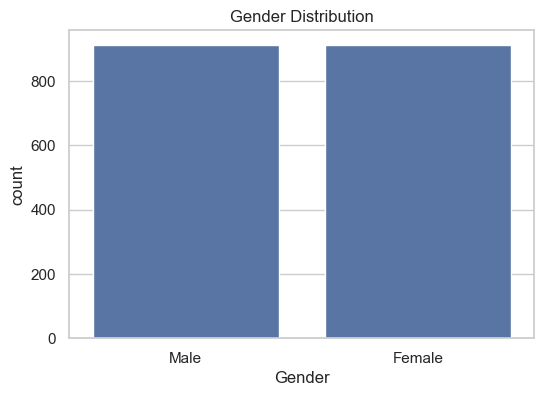

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.show()

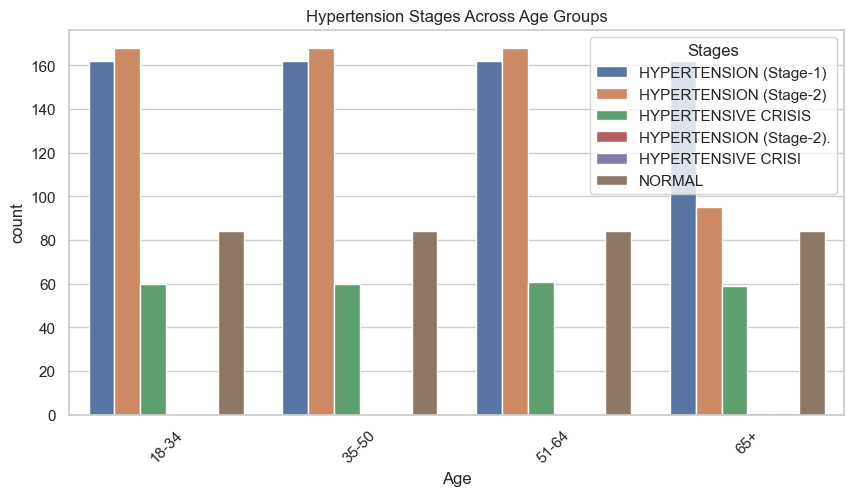

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Age", hue="Stages")
plt.title("Hypertension Stages Across Age Groups")
plt.xticks(rotation=45)
plt.show()


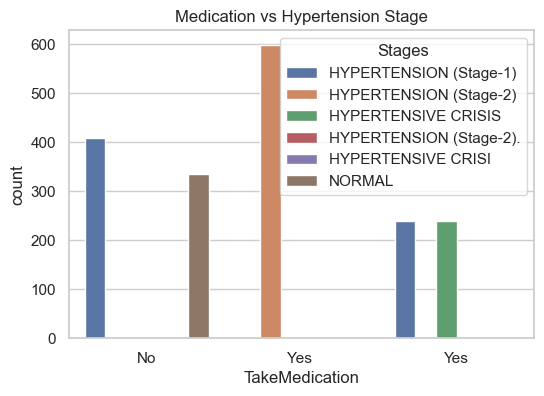

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="TakeMedication", hue="Stages")
plt.title("Medication vs Hypertension Stage")
plt.show()

In [16]:
df_encoded = df.copy()
binary_map = {'No': 0, 'Yes': 1}
df_encoded["HasHistory"] = df_encoded["HasHistory"].map(binary_map)
df_encoded["IsPatient"] = df_encoded["IsPatient"].map(binary_map)
df_encoded["TakeMedication"] = df_encoded["TakeMedication"].map(binary_map)
df_encoded["ControlledDiet"] = df_encoded["ControlledDiet"].map(binary_map)
df_encoded["BreathShortness"] = df_encoded["BreathShortness"].map(binary_map)
df_encoded["VisualChanges"] = df_encoded["VisualChanges"].map(binary_map)
df_encoded["NoseBleeding"] = df_encoded["NoseBleeding"].map(binary_map)

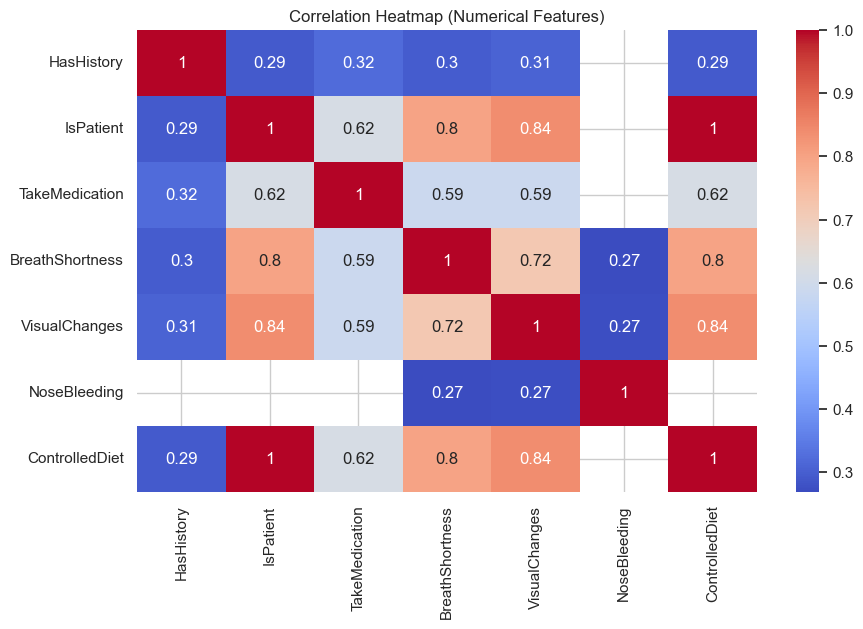

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

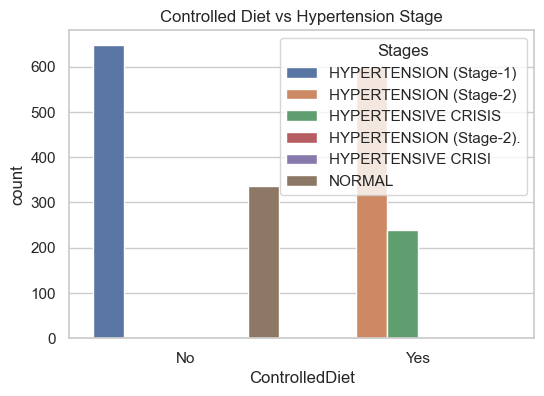

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="ControlledDiet", hue="Stages")
plt.title("Controlled Diet vs Hypertension Stage")
plt.show()

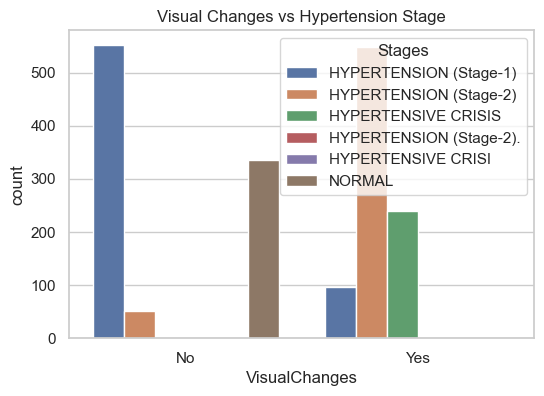

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="VisualChanges", hue="Stages")
plt.title("Visual Changes vs Hypertension Stage")
plt.show()

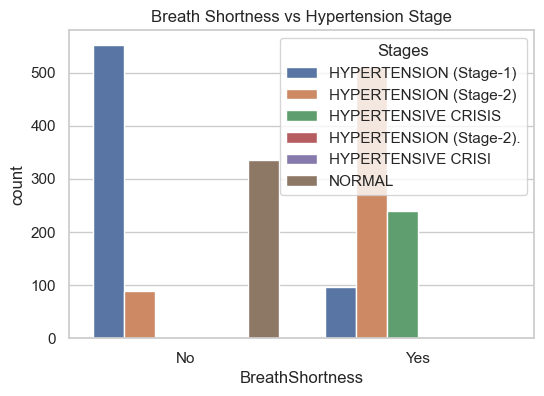

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="BreathShortness", hue="Stages")
plt.title("Breath Shortness vs Hypertension Stage")
plt.show()

# Univariate EDA

In [21]:
categorical_cols = ["Gender", "Age", "TakeMedication", "ControlledDiet", 
                    "VisualChanges", "BreathShortness", "Severity", "Stages"]

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("\n")



--- Gender ---
Gender
Female    913
Male      912
Name: count, dtype: int64



--- Age ---
Age
51-64    475
18-34    474
35-50    474
65+      402
Name: count, dtype: int64



--- TakeMedication ---
TakeMedication
No      744
Yes     600
Yes     481
Name: count, dtype: int64



--- ControlledDiet ---
ControlledDiet
No     984
Yes    841
Name: count, dtype: int64



--- VisualChanges ---
VisualChanges
No     940
Yes    885
Name: count, dtype: int64



--- BreathShortness ---
BreathShortness
No     976
Yes    849
Name: count, dtype: int64



--- Severity ---
Severity
Moderate    697
Sever       576
Mild        552
Name: count, dtype: int64



--- Stages ---
Stages
HYPERTENSION (Stage-1)     648
HYPERTENSION (Stage-2)     599
NORMAL                     336
HYPERTENSIVE CRISIS        240
HYPERTENSION (Stage-2).      1
HYPERTENSIVE CRISI           1
Name: count, dtype: int64




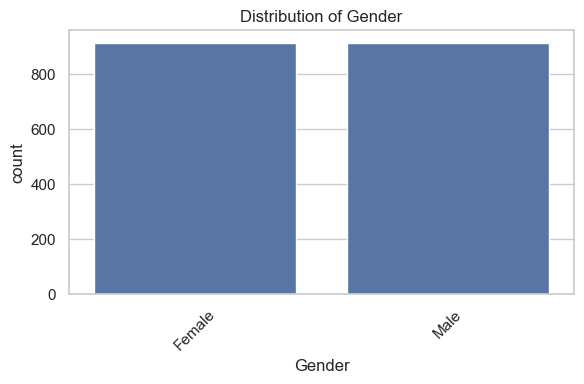

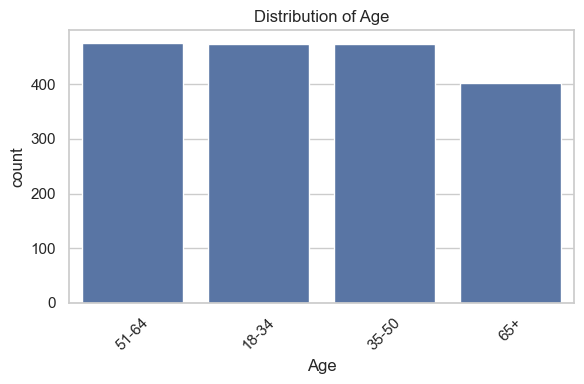

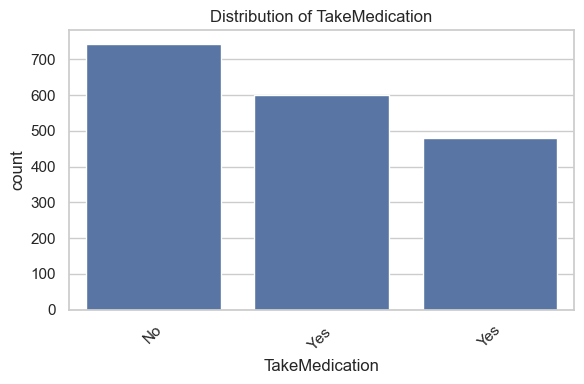

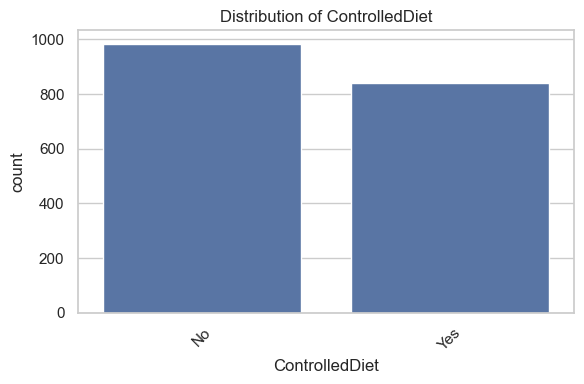

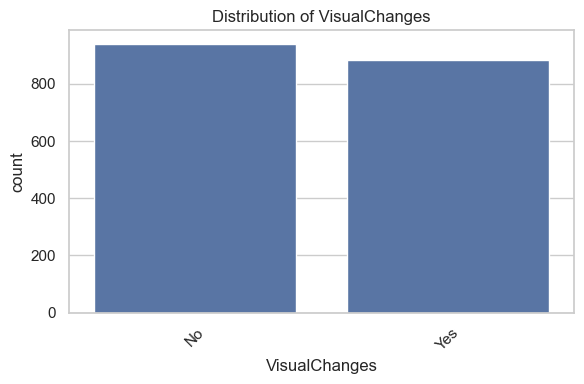

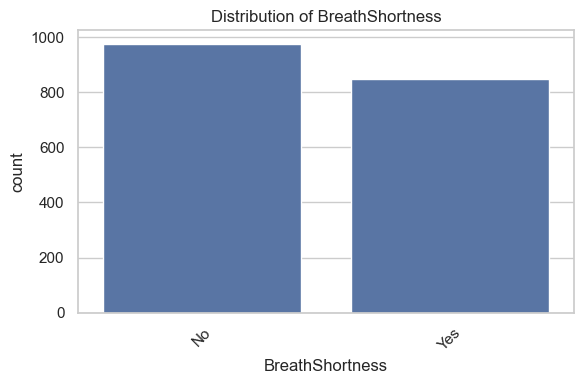

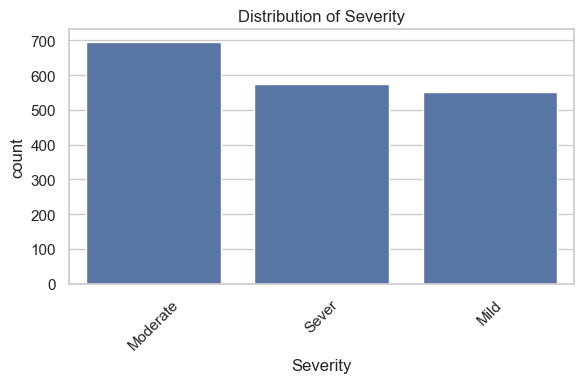

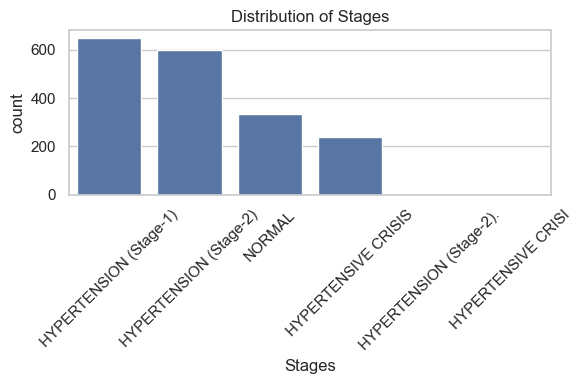

In [22]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#  Multivariate EDA

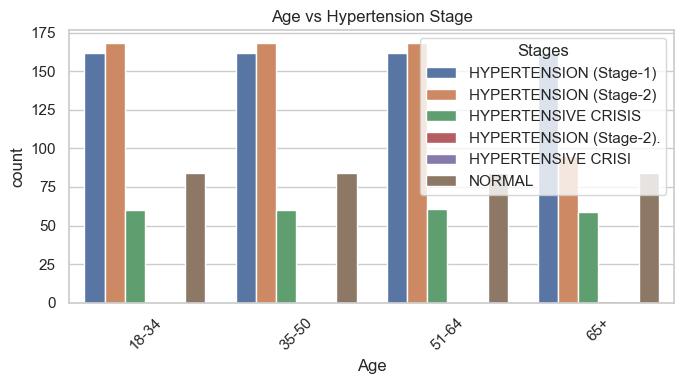

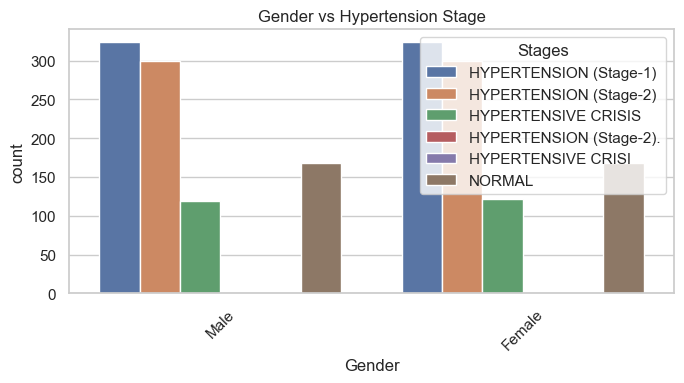

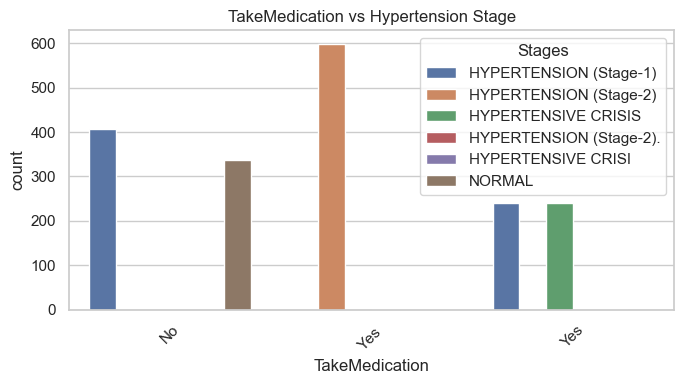

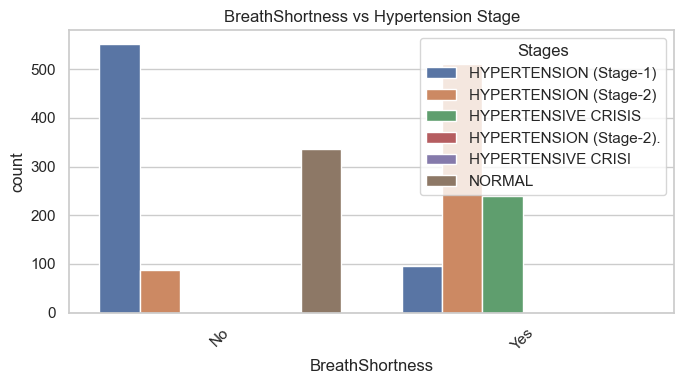

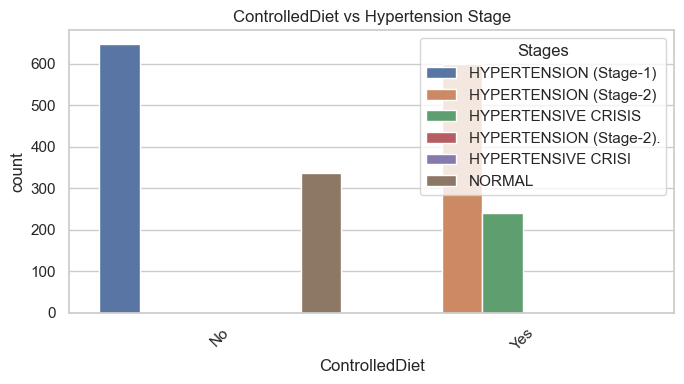

In [23]:
for col in ["Age", "Gender", "TakeMedication", "BreathShortness", "ControlledDiet"]:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, hue="Stages")
    plt.title(f"{col} vs Hypertension Stage")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


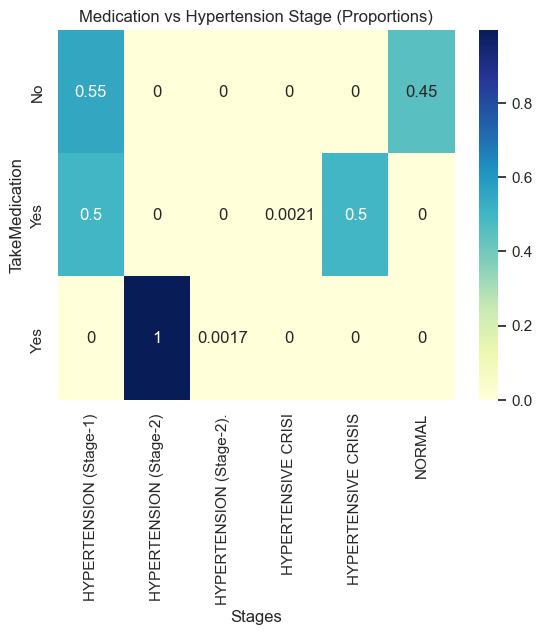

In [24]:
ct = pd.crosstab(df["TakeMedication"], df["Stages"], normalize='index')
sns.heatmap(ct, annot=True, cmap="YlGnBu")
plt.title("Medication vs Hypertension Stage (Proportions)")
plt.show()


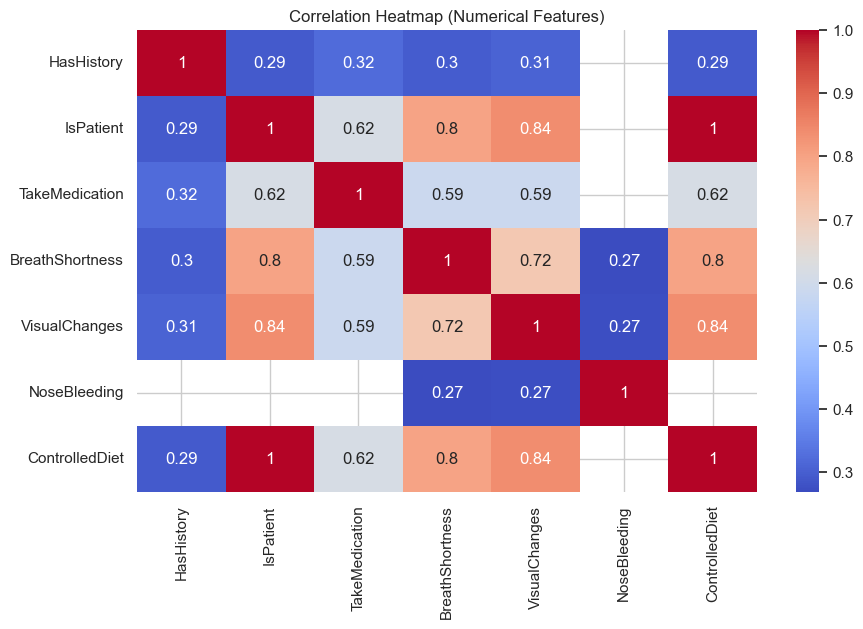

In [25]:
df_encoded = df.copy()
binary_map = {'No': 0, 'Yes': 1}
df_encoded["HasHistory"] = df_encoded["HasHistory"].map(binary_map)
df_encoded["IsPatient"] = df_encoded["IsPatient"].map(binary_map)
df_encoded["TakeMedication"] = df_encoded["TakeMedication"].map(binary_map)
df_encoded["ControlledDiet"] = df_encoded["ControlledDiet"].map(binary_map)
df_encoded["BreathShortness"] = df_encoded["BreathShortness"].map(binary_map)
df_encoded["VisualChanges"] = df_encoded["VisualChanges"].map(binary_map)
df_encoded["NoseBleeding"] = df_encoded["NoseBleeding"].map(binary_map)

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


# Handling the Categorical Values

In [26]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

In [27]:
df['stages'] = df['stages'].replace({
    'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)',
    'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS'
})

In [28]:
def convert_bp_range(value):
    try:
        parts = value.split('-')
        return (int(parts[0].strip()) + int(parts[1].strip())) // 2
    except:
        return np.nan


In [29]:
df.columns.tolist()

['gender',
 'age',
 'hashistory',
 'ispatient',
 'takemedication',
 'severity',
 'breathshortness',
 'visualchanges',
 'nosebleeding',
 'whendiagnosed',
 'systolicbp',
 'diastolicbp',
 'controlleddiet',
 'stages']

## Data Preprocessing and Encoding

In [30]:
df['systolicbp'] = df['systolicbp'].apply(convert_bp_range)
df['diastolicbp'] = df['diastolicbp'].apply(convert_bp_range)


In [31]:
binary_cols = ['hashistory', 'ispatient', 'takemedication', 'breathshortness', 
               'visualchanges', 'nosebleeding', 'controlleddiet']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


C:\Users\samay\AppData\Local\Temp\ipykernel_16004\831301913.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


In [32]:
df = pd.get_dummies(df, columns=['gender', 'age', 'whendiagnosed'], drop_first=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['stages_encoded'] = le.fit_transform(df['stages'])

In [34]:
# Display shape and columns
print(df.shape)
print(df.columns)

(1825, 18)
Index(['hashistory', 'ispatient', 'takemedication', 'severity',
       'breathshortness', 'visualchanges', 'nosebleeding', 'systolicbp',
       'diastolicbp', 'controlleddiet', 'stages', 'gender_Male', 'age_35-50',
       'age_51-64', 'age_65+', 'whendiagnosed_<1 Year',
       'whendiagnosed_>5 Years', 'stages_encoded'],
      dtype='object')


In [35]:
print(df.isnull().sum())

hashistory                  0
ispatient                   0
takemedication              0
severity                    0
breathshortness             0
visualchanges               0
nosebleeding                0
systolicbp                240
diastolicbp               241
controlleddiet              0
stages                      0
gender_Male                 0
age_35-50                   0
age_51-64                   0
age_65+                     0
whendiagnosed_<1 Year       0
whendiagnosed_>5 Years      0
stages_encoded              0
dtype: int64


In [36]:
df['systolicbp'].fillna(df['systolicbp'].median(), inplace=True)
df['diastolicbp'].fillna(df['diastolicbp'].median(), inplace=True)

C:\Users\samay\AppData\Local\Temp\ipykernel_16004\284766620.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['systolicbp'].fillna(df['systolicbp'].median(), inplace=True)
C:\Users\samay\AppData\Local\Temp\ipykernel_16004\284766620.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [37]:
df['pulse_pressure'] = df['systolicbp'] - df['diastolicbp']

In [38]:
df.columns.tolist()

['hashistory',
 'ispatient',
 'takemedication',
 'severity',
 'breathshortness',
 'visualchanges',
 'nosebleeding',
 'systolicbp',
 'diastolicbp',
 'controlleddiet',
 'stages',
 'gender_Male',
 'age_35-50',
 'age_51-64',
 'age_65+',
 'whendiagnosed_<1 Year',
 'whendiagnosed_>5 Years',
 'stages_encoded',
 'pulse_pressure']

In [39]:
# Explicit conversion of binary categorical columns
binary_cols = ["hashistory", "ispatient", "takemedication", "breathshortness", 
               "visualchanges", "nosebleeding", "controlleddiet"]

# Normalize capitalization and whitespace, then map to 1/0
for col in binary_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

In [40]:
# Convert 'Yes'/'No' strings to 1/0 in binary columns
binary_columns = ['hashistory', 'ispatient', 'takemedication', 'breathshortness', 
                  'visualchanges', 'nosebleeding', 'controlleddiet']

for col in binary_columns:
    df[col] = df[col].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

In [41]:
print(df[binary_columns].dtypes)

hashistory         float64
ispatient          float64
takemedication     float64
breathshortness    float64
visualchanges      float64
nosebleeding       float64
controlleddiet     float64
dtype: object


## Model Traininig

In [42]:
import re
X = df.drop(columns=['stages', 'stages_encoded', 'severity'])
y = df['stages_encoded']

X = X.rename(columns={
    'age_65+': 'age_65',
    'whendiagnoused_<1 Year': 'whendiagnoused_1year',
    'whendiagnoused_>5 Years': 'whendiagnoused_5years'
})

# Also clean any leftover bad characters just in case
X.columns = [re.sub(r'[^A-Za-z0-9_]', '', col) for col in X.columns]
X.columns = X.columns.astype(str)

# Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
print(X.dtypes[X.dtypes == 'object'])

Series([], dtype: object)


In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1,
                    use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

C:\Users\samay\anaconda3\envs\ml_env\lib\site-packages\xgboost\training.py:183: UserWarning: [11:21:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
xgb_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, xgb_pred)
print("✅ XGBoost Accuracy:", round(accuracy * 100, 2), "%")
print("\n Classification Report:\n", classification_report(y_test, xgb_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

✅ XGBoost Accuracy: 71.51 %

 Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.71       139
           1       0.65      0.82      0.72       120
           2       0.00      0.00      0.00        46
           3       1.00      1.00      1.00        60

    accuracy                           0.72       365
   macro avg       0.58      0.64      0.61       365
weighted avg       0.63      0.72      0.67       365


 Confusion Matrix:
 [[103  35   1   0]
 [ 22  98   0   0]
 [ 28  18   0   0]
 [  0   0   0  60]]


## Model Deployment

In [46]:
import joblib

joblib.dump(xgb, "BP_Stage_Predictor.pkl")
print("Model saved as BP_Stage_Predictor.pkl")

Model saved as BP_Stage_Predictor.pkl


## Further Coding is in BP_web.py